In [1]:
import os, csv
import numpy as np
import pandas as pd

from time import sleep
from datetime import datetime as dt
from datetime import timedelta
from dateutil.relativedelta import relativedelta

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

from IPython.core.pylabtools import figsize
from IPython.display  import display

from matplotlib import pyplot as plt
from matplotlib_venn import venn3
import matplotlib.ticker as ptick

import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact

%matplotlib inline

In [2]:
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.family'] = 'IPAGothic'

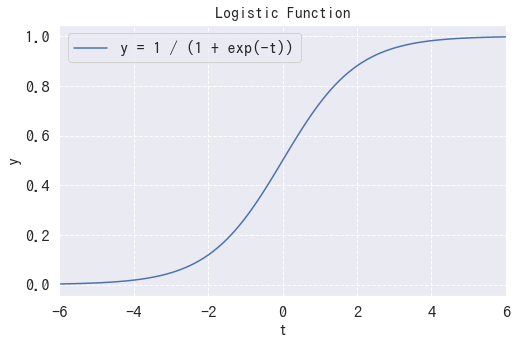

In [3]:
def logistic(t, k=1, C=1, m=0):
    y = C / (1 + np.exp(-k * (t - m)))
    return y

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(linestyle = "--")
ax.set_title("Logistic Function", fontsize=16)
ax.set_xlim(-6, 6)
ax.set_xlabel("t", fontsize=16)
ax.set_ylabel("y", fontsize=16)

# tのデータ
t = np.linspace(-6, 6, 100)

# x0を変えながらロジスティック曲線をプロット
y = logistic(t, k=1, C=1, m=0)
ax.plot(t, y, label="y = 1 / (1 + exp(-t))")

#ax.plot(t, y)
ax.legend()

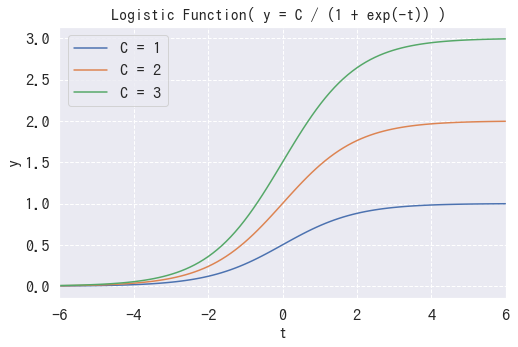

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(linestyle = "--")
ax.set_title("Logistic Function( y = C / (1 + exp(-t)) ) ", fontsize=16)
ax.set_xlim(-6, 6)
ax.set_xlabel("t", fontsize=16)
ax.set_ylabel("y", fontsize=16)

# tのデータ
t = np.linspace(-6, 6, 100)

# x0を変えながらロジスティック曲線をプロット
for c in [1, 2, 3]:
    y = logistic(t, k=1, C=c, m=0)
    ax.plot(t, y, label=f"C = {c}")
ax.legend()

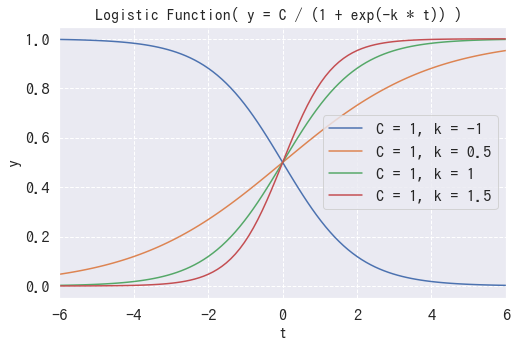

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(linestyle = "--")
ax.set_title("Logistic Function( y = C / (1 + exp(-k * t)) ) ", fontsize=16)
ax.set_xlim(-6, 6)
ax.set_xlabel("t", fontsize=16)
ax.set_ylabel("y", fontsize=16)

# tのデータ
t = np.linspace(-6, 6, 100)

# x0を変えながらロジスティック曲線をプロット
for k in [-1, 0.5, 1, 1.5, ]:
    y = logistic(t, k=k, C=1, m=0)
    ax.plot(t, y, label=f"C = 1, k = {k}")
ax.legend()
plt.show()

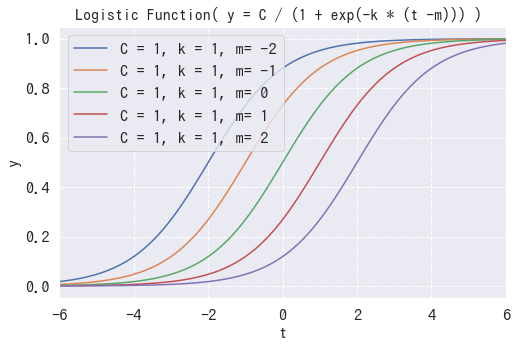

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(linestyle = "--")
ax.set_title("Logistic Function( y = C / (1 + exp(-k * (t -m))) ) ", fontsize=16)
ax.set_xlim(-6, 6)
ax.set_xlabel("t", fontsize=16)
ax.set_ylabel("y", fontsize=16)

# tのデータ
t = np.linspace(-6, 6, 100)

# x0を変えながらロジスティック曲線をプロット
for m in [-2, -1, 0, 1, 2]:
    y = logistic(t, k=1, C=1, m=m)
    ax.plot(t, y, label=f"C = 1, k = 1, m= {m}")
ax.legend()
plt.show()

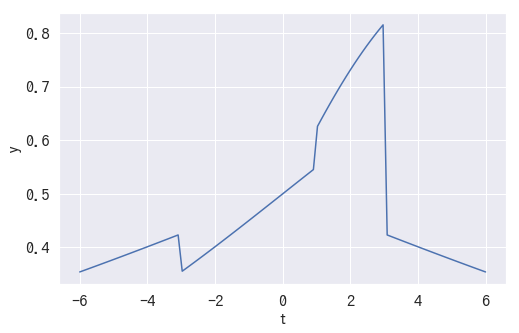

In [7]:
T = np.linspace(-6, 6, 100)
S = np.array([-3, 1, 3])
delta = np.array([0.1, 0.3, -0.6])
def logistic_trend(T, S, delta, k=1, C=1, m=0):
    a = np.vstack([np.where(S < t, 1, 0) for t in T])
    y = C / (1 + np.exp(-(k + (a * delta).sum(axis=1)) * (T - m)))
    return y
out  = logistic_trend(T, S, delta, k=0.1, m=0)

plt.plot(T, out)
plt.xlabel("t", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.show()

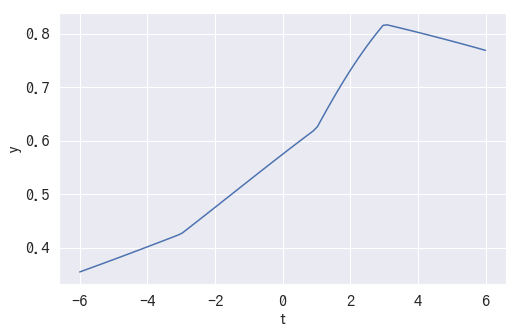

In [8]:
T = np.linspace(-6, 6, 100)
S = np.array([-3, 1, 3])
delta = np.array([0.1, 0.3, -0.6])
def logistic_trend(T, S, delta, k=1, C=1, m=0):
    a = np.vstack([np.where(S < t, 1, 0) for t in T])
    gamma = np.zeros(S.shape)
    for j in range(0, gamma.shape[0]):
        gamma[j] = (S[j] - m - gamma[:j].sum()) * (1 - ((k + delta[:j].sum()) / (k + delta[:j + 1].sum())))
    y = C / (1 + np.exp(-(k + (a * delta).sum(axis=1)) * (T - (m + (a * gamma).sum(axis=1)))))
    return y
out  = logistic_trend(T, S, delta, k=0.1, m=0)

plt.plot(T, out)
plt.xlabel("t", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.show()

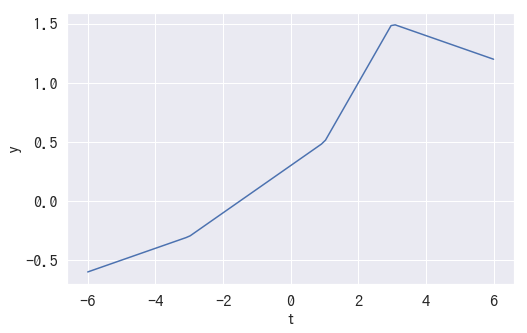

In [9]:
T = np.linspace(-6, 6, 100)
S = np.array([-3, 1, 3])
delta = np.array([0.1, 0.3, -0.6])
def linear_trend(T, S, delta, k=1, m=0):
    a = np.vstack([np.where(S < t, 1, 0) for t in T])
    gamma = -S * delta
    y = (k + (a * delta).sum(axis=1)) * T + (m + (a * gamma).sum(axis=1))
    return y
out  = linear_trend(T, S, delta, k=0.1, m=0)

plt.plot(T, out)
plt.xlabel("t", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.show()

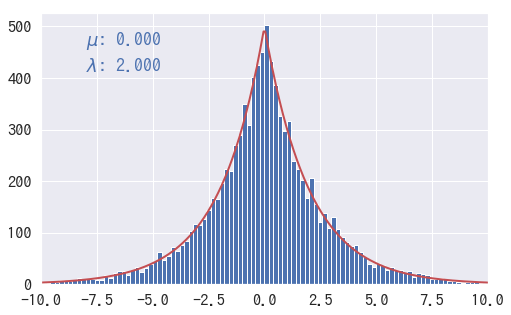

In [10]:
# mu & S
mu, scale = 0.0, 2.0
N = 10000                # サンプル数
Nb = 100                 # ヒストグラムプロットのビン数
min_x, max_x = mu-5*scale, mu+5*scale
dx = (max_x-min_x)/Nb    # ビン幅


# generating laplace distribution
s = np.random.laplace(mu, scale, N)
#av  = np.mean(s)
#std = np.std(s)


x = np.linspace(min_x, max_x, 256)
y =  np.exp(-abs(x-mu)/scale)/(2.*scale)

fig    = plt.figure()
plot_1 = fig.add_subplot(1,1,1)
plot_1.set_xlim([min_x, max_x])
plot_1.text(0.1, 0.8, "$\mu$: {0:.3f}\n$\lambda$: {1:.3f}".\
            format(mu, scale), transform=plot_1.transAxes,\
            color='b')
plot_1.hist(s, Nb, range=(min_x, max_x))
plot_1.plot(x, N*dx*y, 'r-', linewidth=2)

plt.show()

## What is Laplace distribution
論文から引用  
*We often specify a large number of changepoints (e.g., one per month for a several year history) and use the prior δj ∼ Laplace(0,τ). 
The parameter τ directly controls the flexibility of the model in altering its rate. 
Importantly, a sparse prior on the adjustments δ has no impact on the primary growth rate k, 
so as τ goes to 0 the fit reduces to standard (not-piecewise) logistic or linear growth.*

-0.0011291963148798371
-0.00044887151453366057
-0.0039204338045007985
0.006195231897971502
-0.0006352263816310739


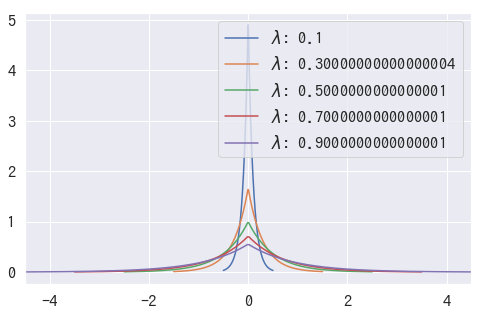

In [11]:
def plt_laplace_dist(mu=0, scale=1):
    N = 10000   # sample size
    Nb = 100     # the number of bin 
    min_x = mu - 5 * scale
    max_x = mu + 5 * scale
    dx = (max_x-min_x)/Nb    # bins width

    # generating laplace distribution
    s = np.random.laplace(mu, scale, N)
    avg = s.mean()
    print(avg)

    x = np.linspace(min_x, max_x, 256)
    y =  np.exp(-abs(x - mu) / scale) / (2. * scale)

    plt.plot(x, y, label=f"$\lambda$: {scale}")
    plt.xlim([min_x, max_x])
for scale in np.arange(0.1, 1, 0.2):
    plt_laplace_dist(scale=scale)
plt.legend()
plt.show()

確かに$\lambda$が小さくなればなるほど0付近に分布が集中している　= ほぼほぼの確率で0に近い値が生成される

0.003417293627451549


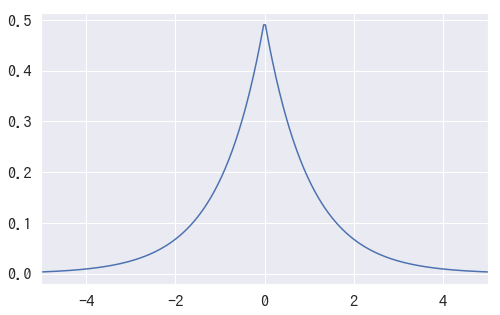

In [12]:
plt_laplace_dist()

### トレンド関数の予測線を描く

(100, 3)


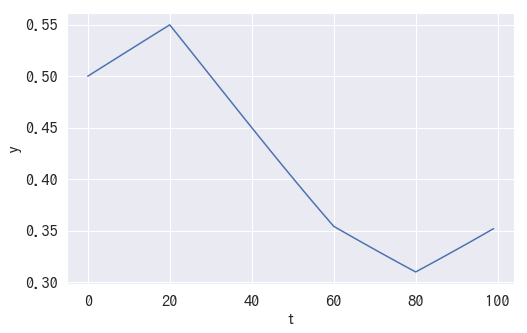

In [13]:
T = np.arange(100)
S = np.array([20, 60, 80])
delta = np.array([-0.03, 0.01, 0.02])
def logistic_trend(T, S, delta, k=1, C=1, m=0):
    a = np.vstack([np.where(S < t, 1, 0) for t in T])
    print(a.shape)
    gamma = np.zeros(S.shape)
    for j in range(0, gamma.shape[0]):
        gamma[j] = (S[j] - m - gamma[:j].sum()) * (1 - ((k + delta[:j].sum()) / (k + delta[:j + 1].sum())))
    y = C / (1 + np.exp(-(k + (a * delta).sum(axis=1)) * (T - (m + (a * gamma).sum(axis=1)))))
    return y
out  = logistic_trend(T, S, delta, k=0.01, m=0)

plt.plot(T, out)
plt.xlabel("t", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.show()

In [14]:
class LogisticTrendEstimator:
    def fit(self, T, S, delta, k=1, C=1, m=0):
        self._T = T
        self._S = S
        self._delta = delta
        self._k = k
        self._C = C
        self._s_freq = len(S) / len(T)
        self._mu_delta = np.abs(delta).mean()
       
        self._y, self._gamma = self._logistic_trend(T, S, delta, k, C, m)
        
    def _logistic_trend(self, T, S, delta, k=1, C=1, m=0):
        a = np.vstack([np.where(S < t, 1, 0) for t in T])
        gamma = np.zeros(S.shape)
        for j in range(0, gamma.shape[0]):
            gamma[j] = (S[j] - m - gamma[:j].sum()) * (1 - ((k + delta[:j].sum()) / (k + delta[:j + 1].sum())))
        y = C / (1 + np.exp(-(k + (a * delta).sum(axis=1)) * (T - (m + (a * gamma).sum(axis=1)))))
        return y, gamma
    
    def __debug_forecast(self, length=10, seed=None):
        #if seed is not None:
        np.random.seed(seed=seed)
        occurrence = np.random.binomial(n=1, p=self._s_freq, size=length)
        generated_s = np.where(occurrence  == 1)[0]
        generated_delta = np.random.laplace(0, self._mu_delta, generated_s.shape[0])
        future = np.hstack([self._T, np.arange(length) + self._T.max()])
        #generated_s + self._T.max()
        future_y, _ = self._logistic_trend(
            T=future,
            S=np.hstack([self._S, generated_s + self._T.max()]),
            delta=np.hstack([self._delta, generated_delta]),
            k=self._k,
            C=self._C,
            )
        plt.plot(
            future, future_y
            )
        plt.xlabel("t", fontsize=16)
        plt.ylabel("y", fontsize=16)
        plt.show()
        return future_y
    
    def forecast(self, length=10, seed=None):
        np.random.seed(seed=seed)
        
        # generate future change point, and its change rate
        occurrence = np.random.binomial(n=1, p=self._s_freq, size=length)
        generated_s = np.where(occurrence  == 1)[0] + self._T.max()
        generated_delta = np.random.laplace(0, self._mu_delta, generated_s.shape[0])
        
        # predict
        future = np.arange(length) + self._T.max()
        future_y, _ = self._logistic_trend(
            T=future,
            S=generated_s,
            delta=generated_delta,
            k=self._k,
            C=self._C,
            m=self._gamma[-1]
            )
        
        # plot y
        plt.plot(self._T, self._y, c='steelblue', label='past')
        plt.plot(future, future_y, c='darkorange', label='predict')
        plt.xlabel("t", fontsize=16)
        plt.ylabel("y", fontsize=16)
        
        # plot change point
        ymax=np.max([self._y.max(), future_y.max()])
        ymin=np.min([self._y.min(), future_y.min()])
        plt.vlines(
            np.hstack([self._S, generated_s]),
            ymin=ymin, ymax=ymax,
            linestyle='dashed',
            color='gray',
            label='change point'
            )

        plt.legend()
        plt.show()
        return future_y

In [15]:
estimator = LogisticTrendEstimator()
estimator.fit(T=T, S=S, delta=delta, k=0.01, m=0)

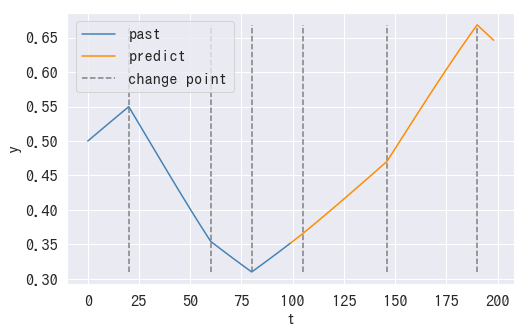

In [16]:
pred = estimator.forecast(
    length=100,
    seed=123
    )
#pred = estimator.forecast(length=100)

## 2. s(t)について

In [22]:
-np.pi

-3.141592653589793

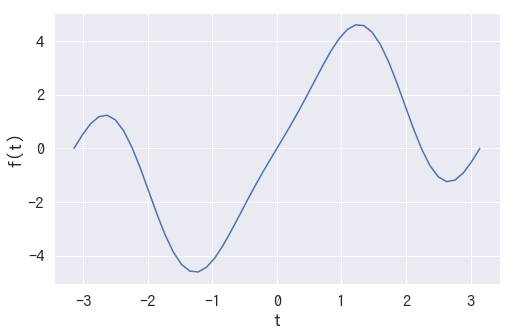

In [50]:
# f(t)=4sin(t)+2sin(3t)−sin(4t)

x = np.linspace(-np.pi, np.pi)
plt.plot(x, 3 * np.sin(x) + 2 * np.sin(2 * x) - np.sin(3 * x), color='b', ls='-', label='3sin(t)+2sin(2t)−sin(3t)')
#plt.xlim(-np.pi, np.pi)
plt.xlabel('t')
plt.ylabel('f(t)')
#plt.legend()
plt.show()

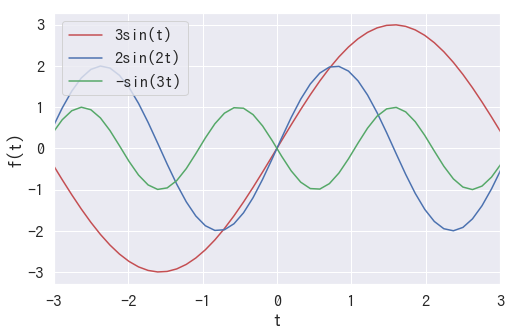

In [51]:
# f(t)=4sin(t)+2sin(3t)−sin(4t)
x = np.linspace(-np.pi, np.pi)
plt.plot(x, 3 * np.sin(x), color='r', ls='-', label='3sin(t)')
plt.plot(x, 2 * np.sin(2 * x), color='b', ls='-', label='2sin(2t)')
plt.plot(x, -np.sin(3 * x), color='g', ls='-', label='−sin(3t)')

plt.xlim(-np.pi, np.pi)
plt.xlim(-3, 3)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()